## MACHINE LEARNING - PREDICTION ON OVER-UNDER PERFORMANCE
Now is the time to do some predictions using ML algoritms. 
Here I will introduce a new data set. The Students above were last years roster. I will use the old data to train an ML model and apply that on new students. 

As of the end of the year, we had all the ALEKS topics and all sort of interim grades. However, since the project aims to predict who will over-under perform at the end of the year, the only numerical grade data we have in hand is the Benchmark test scores. Together with that, we have other sort of information about the students which might be useful. 

Steps to be taken:
1. Extract the columns to be used
2. Handle the null values
3. Extract numerical data from object columns
4. Create dummy columns for categorical columns
5. Train the Machine Learning model, using Logistic Regression and Random Forest algoritms
6. Cross-validate results using CV methods.
7. Introduce new data and apply the trained model on newly introduced data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel("data_old.xlsx", header=1)

In [3]:
data.columns

Index(['Student', 'ELAScaleScore', 'ELAAchievement', 'MathScaleScore',
       'MathAchievement', 'SocialScaleScore', 'SocialAchievement', 'Gender',
       'Economically Disadvantaged', 'Ethnicity', 'Education Classification',
       'EL Flag', 'EL Indicator Code', '2017-2018 Test ',
       '2017-2018 ELA Scale Score', '2017-2018 ELA Achievement Level',
       '2018-2019 Test', '2018-2019 ELA Scale Score',
       '2018-2019 ELA Achievement Level', '2018-2019  VAM Target',
       'Growth Percentile Rank', '2017-2018 Test .1',
       '2017-2018 Math Scale Score', '2017-2018 Math Achievement Level',
       '2018-2019 Test.1', '2018-2019 Math Scale Score',
       '2018-2019 Math Achievement Level', '2018-2019  VAM Target Math',
       'Growth Percentile Rank.1', 'Grade', 'College', 'Zip code', 'ESS',
       'ALEKS', 'iXL - ELA', 'iXL - SS', 'Star', 'Newsela # Quizzes',
       'Newsela Av. Score', 'Newsela Read. Lev.', 'PBIS', 'Incidents',
       '17-18 LEAP ELA', '17-18 LEAP Math',
       '

In [4]:
columns_ML = ['Gender','Economically Disadvantaged', 'Ethnicity', 
              'Education Classification','EL Flag',
              'Benchmark 1 ELA','Benchmark 1 Math','Benchmark 1 Science','Benchmark 1 Social Studies','Performance']

In [5]:
data[columns_ML].isnull().sum()

Gender                        17
Economically Disadvantaged    17
Ethnicity                     17
Education Classification      17
EL Flag                       17
Benchmark 1 ELA                0
Benchmark 1 Math              14
Benchmark 1 Science            1
Benchmark 1 Social Studies     0
Performance                   31
dtype: int64

In [6]:
data = data[columns_ML]

In [7]:
data.shape

(370, 10)

In [8]:
data = data.dropna()

In [9]:
data.shape

(325, 10)

In [10]:
def extractor(string):
    perc = string.split("% /")
    
    return (perc[0])

benchmark_cols = ["Benchmark 1 ELA", "Benchmark 1 Math", "Benchmark 1 Science", "Benchmark 1 Social Studies"]

for col in benchmark_cols:
    print(col)
    data[col] = data[col].apply(extractor)

Benchmark 1 ELA
Benchmark 1 Math
Benchmark 1 Science
Benchmark 1 Social Studies


In [11]:
data[benchmark_cols].head()

,Benchmark 1 ELA,Benchmark 1 Math,Benchmark 1 Science,Benchmark 1 Social Studies
0,46.6,3,53.3,32.7
1,22.4,10,73.3,44.9
2,46.6,19,40,32.7
3,48.3,16,33.3,16.3
4,31,16,40,36.7


In [12]:
for col in benchmark_cols:
    print(col)
    data[col] = data[col].astype(float)

Benchmark 1 ELA
Benchmark 1 Math
Benchmark 1 Science
Benchmark 1 Social Studies


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 369
Data columns (total 10 columns):
Gender                        325 non-null object
Economically Disadvantaged    325 non-null float64
Ethnicity                     325 non-null float64
Education Classification      325 non-null float64
EL Flag                       325 non-null object
Benchmark 1 ELA               325 non-null float64
Benchmark 1 Math              325 non-null float64
Benchmark 1 Science           325 non-null float64
Benchmark 1 Social Studies    325 non-null float64
Performance                   325 non-null float64
dtypes: float64(8), object(2)
memory usage: 27.9+ KB


In [14]:
data.columns

Index(['Gender', 'Economically Disadvantaged', 'Ethnicity',
       'Education Classification', 'EL Flag', 'Benchmark 1 ELA',
       'Benchmark 1 Math', 'Benchmark 1 Science', 'Benchmark 1 Social Studies',
       'Performance'],
      dtype='object')

We need to map some values

In [15]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [16]:
data.Gender.value_counts()

M    177
F    148
Name: Gender, dtype: int64

In [17]:
data.Gender = data.Gender.apply(lambda x:1 if x=="F" else 0)

We figured that there is a mapping problem between the new and the old _Ethnicity_ data. We have created a dictionary to map the old values into new ones.

In [18]:
data.Ethnicity.unique()

array([4., 3., 5., 1., 7.])

In [19]:
eth_dict = {1:4, 3:1, 4:2, 5:0, 7:1, 2:3}

def mapper(num):
    return eth_dict(num)

In [20]:
data.Ethnicity.value_counts()

3.0    273
4.0     37
5.0     12
7.0      2
1.0      1
Name: Ethnicity, dtype: int64

In [21]:
data.Ethnicity = data.Ethnicity.apply(lambda x:eth_dict[x])

In [22]:
data.Ethnicity.value_counts()

1    275
2     37
0     12
4      1
Name: Ethnicity, dtype: int64

We need to categorize Ethnicity data

In [23]:
eth = pd.get_dummies(data.Ethnicity, drop_first=True)
eth.rename(columns={1:"E1", 2:"E2", 3:"E3",0:"E0", 4:"E4"}, inplace=True)

In [24]:
data= pd.concat([data,eth], axis=1)

In [25]:
data.head()

,Gender,Economically Disadvantaged,Ethnicity,Education Classification,EL Flag,Benchmark 1 ELA,Benchmark 1 Math,Benchmark 1 Science,Benchmark 1 Social Studies,Performance,E1,E2,E4
0,1,1.0,2,0.0,Y,46.6,3.0,53.3,32.7,-3.0,0,1,0
1,0,1.0,1,0.0,N,22.4,10.0,73.3,44.9,12.0,1,0,0
2,0,1.0,1,0.0,N,46.6,19.0,40.0,32.7,-5.0,1,0,0
3,1,1.0,1,0.0,N,48.3,16.0,33.3,16.3,-1.0,1,0,0
4,1,1.0,1,0.0,N,31.0,16.0,40.0,36.7,0.0,1,0,0


In [26]:
data.drop("Ethnicity", axis=1, inplace=True)

We have been informed that Education Clasification == 1 and 2 are the same thing, so we need to make all 2's 1's.

In [27]:
data["Education Classification"].unique()

array([0., 1., 2.])

In [28]:
data["Education Classification"].value_counts()

0.0    286
1.0     38
2.0      1
Name: Education Classification, dtype: int64

In [29]:
def map_edu(num):
    if num==2:
        return 1
    else:
        return num
    
data["Education Classification"] = data["Education Classification"].apply(lambda x: 1 if (x==2) else x)

In [30]:
data["Education Classification"].unique()

array([0., 1.])

In [31]:
data["EL Flag"].unique()

array(['Y', 'N'], dtype=object)

In [32]:
data["EL Flag"] = data["EL Flag"].apply(lambda x: 1 if x=="Y" else 0)

In [33]:
data.head()

,Gender,Economically Disadvantaged,Education Classification,EL Flag,Benchmark 1 ELA,Benchmark 1 Math,Benchmark 1 Science,Benchmark 1 Social Studies,Performance,E1,E2,E4
0,1,1.0,0.0,1,46.6,3.0,53.3,32.7,-3.0,0,1,0
1,0,1.0,0.0,0,22.4,10.0,73.3,44.9,12.0,1,0,0
2,0,1.0,0.0,0,46.6,19.0,40.0,32.7,-5.0,1,0,0
3,1,1.0,0.0,0,48.3,16.0,33.3,16.3,-1.0,1,0,0
4,1,1.0,0.0,0,31.0,16.0,40.0,36.7,0.0,1,0,0


Our target column is __Performance__ We want to classify that as positive or negative only, which means that the particular student is either over or under performed at the end of the year.

In [34]:
data.Performance = data.Performance.apply(lambda x : 1 if x>=0 else 0)

In [35]:
data.head()

,Gender,Economically Disadvantaged,Education Classification,EL Flag,Benchmark 1 ELA,Benchmark 1 Math,Benchmark 1 Science,Benchmark 1 Social Studies,Performance,E1,E2,E4
0,1,1.0,0.0,1,46.6,3.0,53.3,32.7,0,0,1,0
1,0,1.0,0.0,0,22.4,10.0,73.3,44.9,1,1,0,0
2,0,1.0,0.0,0,46.6,19.0,40.0,32.7,0,1,0,0
3,1,1.0,0.0,0,48.3,16.0,33.3,16.3,0,1,0,0
4,1,1.0,0.0,0,31.0,16.0,40.0,36.7,1,1,0,0


In [36]:
correlation = data.corr()

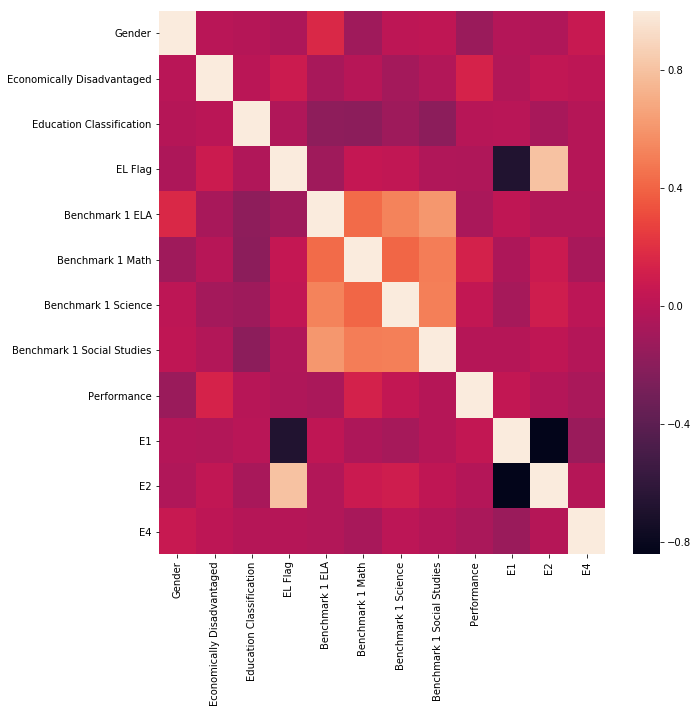

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation)
plt.show()

As expected, _EL Flag_ and _Ethnicity_ data shows great deal of correlation. We could give it a try as is first. Then maybe eleminate one of them, preferably _EL Flag_

In [38]:
data = data.drop("EL Flag", axis=1)

## Time for applying ML algorithms. 
Let us begin with Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [40]:
y= data["Performance"]
X=data.drop(["Performance"], axis=1)

In [41]:
lr=LogisticRegression(solver="lbfgs", max_iter=1000, random_state=2)
scores = cross_val_score(lr,X, y, cv=10)
    

In [42]:
scores

array([0.48484848, 0.60606061, 0.60606061, 0.63636364, 0.57575758,
       0.66666667, 0.6875    , 0.59375   , 0.625     , 0.64516129])

In [43]:
score= scores.mean()

In [44]:
print(score)

0.6127168866080156


In [45]:
# Let us do some hyperparameter optimization
lr_grid=LogisticRegression()
penalty = ["l1", "l2"]
C=np.logspace(0,4,10)
tol = [0.0001, 0.001, 0.01, 0.1, 1, 10]
hyperparam = dict(C=C,penalty=penalty, tol=tol)
clf = GridSearchCV(lr_grid, hyperparam, cv=10, verbose=0)


In [46]:
best_model=clf.fit(X,y)

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWar

In [47]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best tol:', best_model.best_estimator_.get_params()['tol'])

Best Penalty: l1
Best C: 1291.5496650148827
Best tol: 0.1


In [48]:
pred = clf.predict(X)

In [49]:
print(confusion_matrix(y,pred))

[[ 39  90]
 [ 23 173]]


Let us try another algoritm for better results

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
reg=RandomForestClassifier()
n_estimators = [i for i in range(200,501,100)]
min_samples_leaf=[i for i in range(5,10)]
hyperparam = dict(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf)
clf_RF = GridSearchCV(reg, hyperparam, cv=10, verbose=0)

In [52]:
best_RF_model = clf_RF.fit(X,y)

C:\Users\Nil\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [53]:
print('Best n_estimators:', best_RF_model.best_estimator_.get_params()['n_estimators'])
print('Best min_samples_leaf:', best_RF_model.best_estimator_.get_params()['min_samples_leaf'])

Best n_estimators: 300
Best min_samples_leaf: 9


In [54]:
pred_RF=clf_RF.predict(X)

In [55]:
print(confusion_matrix(y,pred_RF))

[[ 47  82]
 [ 11 185]]


Now let us compare two algoritms using accuracy score and classification reports

In [56]:
from sklearn.metrics import accuracy_score, classification_report

In [57]:
print("Logistic Regression accuracy is ",accuracy_score(y,pred).round(2))
print("Random Forest accuracy is ",accuracy_score(y,pred_RF).round(2))

Logistic Regression accuracy is  0.65
Random Forest accuracy is  0.71


A considerable improvement has been achieved by using Random Forest and grid search hyperparameter optimization

In [58]:
print("Logistic Regression Report: \n",classification_report(y,pred))

Logistic Regression Report: 
               precision    recall  f1-score   support

           0       0.63      0.30      0.41       129
           1       0.66      0.88      0.75       196

   micro avg       0.65      0.65      0.65       325
   macro avg       0.64      0.59      0.58       325
weighted avg       0.65      0.65      0.62       325



In [59]:
print("Random Forest Classifier Report: \n",classification_report(y,pred_RF))

Random Forest Classifier Report: 
               precision    recall  f1-score   support

           0       0.81      0.36      0.50       129
           1       0.69      0.94      0.80       196

   micro avg       0.71      0.71      0.71       325
   macro avg       0.75      0.65      0.65       325
weighted avg       0.74      0.71      0.68       325



Due to the quality of the data and the fact that we only have student info and first benchmark scores, we consider this results quite satisfactory. As the second and third benchmark scores are added, accuracy is expected to increase. Now let us apply this Random Forest best model to new data (i.e. current year's students).

In [60]:
data_new = pd.read_excel("data_new.xlsx", index_col="Student")

We should do the same cleaning to this data set as well

In [62]:
data.columns

Index(['Gender', 'Economically Disadvantaged', 'Education Classification',
       'Benchmark 1 ELA', 'Benchmark 1 Math', 'Benchmark 1 Science',
       'Benchmark 1 Social Studies', 'Performance', 'E1', 'E2', 'E4'],
      dtype='object')

In [63]:
columns_ML

['Gender',
 'Economically Disadvantaged',
 'Ethnicity',
 'Education Classification',
 'EL Flag',
 'Benchmark 1 ELA',
 'Benchmark 1 Math',
 'Benchmark 1 Science',
 'Benchmark 1 Social Studies',
 'Performance']

In [64]:
data_new.isnull().sum()

Grade 2020                     0
College                        0
Math                          12
Science                        2
Social Studies                 5
ELA - Anet                    10
Gender                         0
Economically Disadvantaged     0
Ethnicity                      0
Education Classification       0
EL Flag                        0
dtype: int64

In [65]:
data_new.dropna(inplace=True)

In [66]:
data_new.isnull().sum()

Grade 2020                    0
College                       0
Math                          0
Science                       0
Social Studies                0
ELA - Anet                    0
Gender                        0
Economically Disadvantaged    0
Ethnicity                     0
Education Classification      0
EL Flag                       0
dtype: int64

In [67]:
data_new.rename(columns={"Math": "Benchmark 1 Math", "Science":"Benchmark 1 Science", "Social Studies":"Benchmark 1 Social Studies","ELA - Anet":"Benchmark 1 ELA"}, inplace=True)

In [68]:
data_new.head()

,Grade 2020,College,Benchmark 1 Math,Benchmark 1 Science,Benchmark 1 Social Studies,Benchmark 1 ELA,Gender,Economically Disadvantaged,Ethnicity,Education Classification,EL Flag
Student,,,,,,,,,,,
1,7,Grambling,0.15,0.5263,0.25,0.60,F,1,2,1,Y
3,7,Xavier,0.15,0.4737,0.45,0.73,M,1,1,0,N
4,7,Grambling,0.19,0.6316,0.25,0.53,F,1,1,0,N
5,7,LSU,0.23,0.6316,0.35,0.27,F,1,1,0,N
8,7,Xavier,0.27,0.5263,0.65,0.53,F,1,1,0,N


In [69]:
columns_ML = ['Gender',
 'Economically Disadvantaged',
 'Ethnicity',
 'Education Classification',
 'Benchmark 1 ELA',
 'Benchmark 1 Math',
 'Benchmark 1 Science',
 'Benchmark 1 Social Studies']
data_new_ML = data_new[columns_ML]

In [70]:
data_new_ML.head()

,Gender,Economically Disadvantaged,Ethnicity,Education Classification,Benchmark 1 ELA,Benchmark 1 Math,Benchmark 1 Science,Benchmark 1 Social Studies
Student,,,,,,,,
1,F,1,2,1,0.60,0.15,0.5263,0.25
3,M,1,1,0,0.73,0.15,0.4737,0.45
4,F,1,1,0,0.53,0.19,0.6316,0.25
5,F,1,1,0,0.27,0.23,0.6316,0.35
8,F,1,1,0,0.53,0.27,0.5263,0.65


In [71]:
data_new_ML.Gender = data_new_ML.Gender.apply(lambda x:1 if x=="F" else 0)

C:\Users\Nil\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [72]:
for col in benchmark_cols:
    data_new_ML[col] = data_new_ML[col]*100

C:\Users\Nil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
data_new_ML.head()

,Gender,Economically Disadvantaged,Ethnicity,Education Classification,Benchmark 1 ELA,Benchmark 1 Math,Benchmark 1 Science,Benchmark 1 Social Studies
Student,,,,,,,,
1,1,1,2,1,60.0,15.0,52.63,25.0
3,0,1,1,0,73.0,15.0,47.37,45.0
4,1,1,1,0,53.0,19.0,63.16,25.0
5,1,1,1,0,27.0,23.0,63.16,35.0
8,1,1,1,0,53.0,27.0,52.63,65.0


In [74]:
eth_new = pd.get_dummies(data_new_ML.Ethnicity, drop_first=True)
eth_new.rename(columns={1:"E1", 2:"E2", 3:"E3",0:"E0", 4:"E4"}, inplace=True)

In [75]:
data_new_ML= pd.concat([data_new_ML,eth_new], axis=1)

In [76]:
data_new_ML.head()

,Gender,Economically Disadvantaged,Ethnicity,Education Classification,Benchmark 1 ELA,Benchmark 1 Math,Benchmark 1 Science,Benchmark 1 Social Studies,E1,E2,E4
Student,,,,,,,,,,,
1,1,1,2,1,60.0,15.0,52.63,25.0,0,1,0
3,0,1,1,0,73.0,15.0,47.37,45.0,1,0,0
4,1,1,1,0,53.0,19.0,63.16,25.0,1,0,0
5,1,1,1,0,27.0,23.0,63.16,35.0,1,0,0
8,1,1,1,0,53.0,27.0,52.63,65.0,1,0,0


In [77]:
data_new_ML.drop("Ethnicity", axis=1, inplace=True)

In [78]:
data.head()

,Gender,Economically Disadvantaged,Education Classification,Benchmark 1 ELA,Benchmark 1 Math,Benchmark 1 Science,Benchmark 1 Social Studies,Performance,E1,E2,E4
0,1,1.0,0.0,46.6,3.0,53.3,32.7,0,0,1,0
1,0,1.0,0.0,22.4,10.0,73.3,44.9,1,1,0,0
2,0,1.0,0.0,46.6,19.0,40.0,32.7,0,1,0,0
3,1,1.0,0.0,48.3,16.0,33.3,16.3,0,1,0,0
4,1,1.0,0.0,31.0,16.0,40.0,36.7,1,1,0,0


In [79]:
pred_real=best_RF_model.predict(data_new_ML)

In [80]:
data_new_ML["Performance"]=pred_real

In [81]:
data_new_ML.to_excel("data_new_performance.xlsx")

In [83]:
print((1 - data_new_ML.Performance.sum()/data_new_ML.Performance.count())*100, "% of the students are going to underperform at the end of the year 2019-2020")

14.360313315926899 % of the students are going to underperform at the end of the year 2019-2020


Model shows that 14.36% of the new student set will fail at the end of the year according to the data in hand at, just after first quarter. Results have been shared with the people in charge to take action.

The major drawback of this model could be that the difficulty level of exams used in the training data assumed to be the same with the new data set exams, which was taken by the students exactly one year later. Other than that, we assume that this model should work well. 